# Model Development

## Dataset
House prediction dataset: 
```bash
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
```

The dataset contains house sale prices for King county, which includes Seattle. 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Load data
df = pd.read_csv("../data/kc_house_data.csv")

In [55]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Linear Regression
A method to help us understand the relationship between two variables:
- The predictor/independent variable (X)
- The response/dependent variable (Y)

The result of a linear regression is a function that predicts the response variable as a function of the predictor

$
\widehat{Y} = a + bX
$
- `a` refers to the `intercept` of the line
- `b` refers to the `slope`

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
# Create a linear regression object
lm = LinearRegression()
lm

LinearRegression()

### How could the `sqft_living` helps us predict the house `price`?

In [59]:
X = df[['sqft_living']]  # This needs to be a 2D array 
Y = df['price'] # This can be 1D

In [60]:
# Fit linear model
lm.fit(X, Y)

LinearRegression()

In [61]:
# Get the output prediction using X
Yhat = lm.predict(X)
# Print first 5 results
Yhat[:5]

array([287555.06702452, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

In [62]:
# Get the value of the intercept (a)
lm.intercept_

-43580.74309447361

In [63]:
# Get the value of the slope (b)
lm.coef_

array([280.6235679])

Final estimated linear model

$
\widehat{Y} = a + bX
$

In our case: 
$
price = -43580.74 + 280.62356X
$

In [64]:
yhat = -43580.74 + 280.62356*X
print(f'Using X price = {Yhat}')
# or using price
price = -43580.74 + 280.62356*df['sqft_living']
print(f'Using price = {price}')


Using X price = [287555.06702452 677621.82640197 172499.40418656 ... 242655.29616092
 405416.96554144 242655.29616092]
Using price = 0        287555.0608
1        677621.8092
2        172499.4012
3        506441.4376
4        427866.8408
            ...     
21608    385773.3068
21609    604659.6836
21610    242655.2912
21611    405416.9560
21612    242655.2912
Name: sqft_living, Length: 21613, dtype: float64


## Task 1
Repeat process (Linear Model prediction) but using `bedrooms` as the independent variable and `price` as your dependent variable

In [65]:
X = df[['bedrooms']] # 2d
Y = df['price'] # id
lm2 = LinearRegression()
lm2.fit(X, Y)
lm2

LinearRegression()

In [66]:
# find the slope(b) and intercept (a)
lm2.coef_

array([121716.12651184])

In [67]:
lm2.intercept_

129802.35631825973

In [68]:
# Equation
Yhat = 129802.35 + 121716.1265*X
Yhat

,bedrooms
0,494950.7295
1,494950.7295
2,373234.6030
3,616666.8560
4,494950.7295
...,...
21608,494950.7295
21609,616666.8560
21610,373234.6030
21611,494950.7295


## Multiple Linear Regression
If you want to use more variables in our model to predict the price, then, use a `multiple linear regression`

$
\widehat{Y} = a + b_{1}X_{1} + b_{2}X_{2} + b_{3}X_{3}...b_{n}X_{n}
$

For this example good predictors of price will be: 
- sqft_living
- bedrooms
- bathrooms
- sqft_lot

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Load data
df = pd.read_csv("../data/kc_house_data.csv")

In [70]:
# Get all the predictor variables
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']] # 2d
Y = df['price']

In [71]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [72]:
# Get the intercept (a)
a = lm.intercept_
a

79092.32040168752

In [73]:
# Get the slopes b1, b2, b3, b4
bs = list(lm.coef_)
bs

[314.29172074654906,
 -59406.812405435456,
 6268.660401823767,
 -0.37765257884149556]

In [74]:
Yhat = a + (bs[0]*X['sqft_living']) + (bs[1]*X['bedrooms']) + (bs[2]*X['bathrooms']) + (bs[3]*X['sqft_lot'])
Yhat

0        275871.036998
1        719971.131432
2        204775.455179
3        474394.561754
4        438367.862006
             ...      
21608    396982.741865
21609    580955.302268
21610    285047.915072
21611    418508.453026
21612    285151.391879
Length: 21613, dtype: float64

In [75]:
# added 11/20/2024

def PlotPolly(model, independent_variable, dependent_variable, name):
    x_new = np.linspace(15, 55, 100)  # linespace for x axis
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for price ~ length')
    ax = plt.gca() #gca returns the current axes
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf() # get the current figure
    plt.xlabel(name)
    plt.ylabel('Price of Homes')
    plt.show()
    plt.close()

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Load data
df = pd.read_csv("../data/kc_house_data.csv")

Get the variables

In [77]:
x = df['sqft_living']
y = df['price']

In [78]:
# Fit the polynomial (3rd order, cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

            3           2
-3.841e-06 x + 0.08705 x - 90.18 x + 3.368e+05


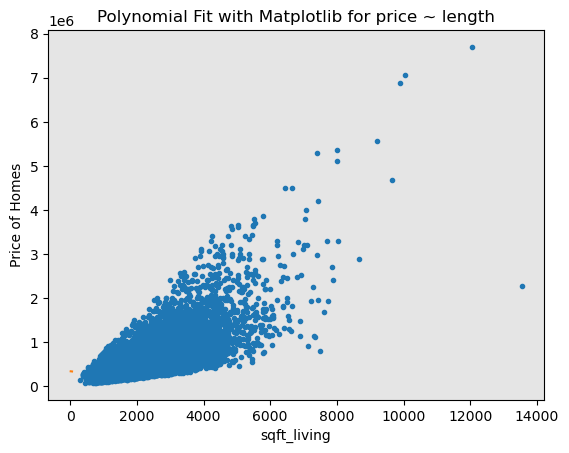

In [79]:
# plot the function
PlotPolly(p, x, y, 'sqft_living')

### Measures for In-Sample Evaluations

You need to do a quantitative measure to determine how accurate your model is. There are two measurements we do: R squared and 
- $R^{2}$ : Coefficient of determination
- MeanSquareError (MSE)


#### Model 1: Simple Linear Regression

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Load data
df = pd.read_csv("../data/kc_house_data.csv")

X = df[['sqft_living']]# 2d
Y = df['price']
Z = [['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']]

# Calculate our R^2
lm.fit(X, Y)
# Find the R^2
print(f'The R^2 is: {lm.score(X,Y)}') # score of how well x and y do.

The R^2 is: 0.4928532179037931


In [ ]:
# calcuate MSE
Yhat = lm.predict(X)
print(f'The output of the first four predicted values is: {Yhat[1:4]}')

The output of the first four predicted values is: [287555.06702452 677621.82640197 172499.40418656 506441.44998452]


In [82]:
from sklearn.metrics import mean_squared_error
# compare it to the prediction
mse = mean_squared_error(df['price'], Yhat)
print(f'The mse of prices is {mse}')

The mse of prices is 68351286833.039825


## Model 2: Multiple Linear Regression

In [83]:
# Multiple Linear Regression
lm.fit(Z, df['price'])
print(f'R^2 is {lm.score(Z, df['price'])}')

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [ ]:
# Get prediction of multifit
Y_predict_multifit = lm.predict(Z)
# Compare the predicted result with the actual result
print(f'The MSE of price predicted value using multifit is: {mean_squared_error(df['price'], Y_predict_multifit)}')

#### Model 3: Polynomial Fit

In [ ]:
from sklearn.metrics import r2_score

X1 = df['sqft_living'] #1d
Y1 = df['price']

f = np.polyfit(X, Y 3) # Get polyfit
p = np.poly1d(f)

r_square = r2_score(Y1, p(X1))
print(f'The R-square value is {r_square}')



SyntaxError: invalid syntax. Perhaps you forgot a comma? (3706758516.py, line 6)

## Prediction and Decision Making

In the previous example we trained the model using the method `fit`. Now we will use the method `predict` to get a prediction

In [90]:
# Create a new input
new_input = np.arange(500, 1000, 1).reshape(-1, 1) # Low and High sqft of how...
# Fit the model
lm.fit(X, Y)

LinearRegression()

In [91]:
yhat = lm.predict(new_input)
yhat[0:5]

c:\Users\K\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([96731.04085425, 97011.66442215, 97292.28799005, 97572.91155794,
       97853.53512584])

In [ ]:
# smgth about plots


### Decision Making: What is a Good Model fit?

- What is a good R^2 value?
  - The model with a `high` $R^{2}$ value is a better fit
- What is a good MSE value?
  - The model with the `smallest` MSE is a better fit